In [1]:
import requests
from IPython.display import HTML
import scrapy

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [11]:
df = pd.read_json('output/res_astana.json')
df = df.drop_duplicates()
np.unique(df.id.values).shape

(1328,)

In [12]:
df2 = pd.read_json('output/res_almaty.json')
print(df2.shape)
df2 = df2.drop_duplicates()
np.unique(df2.id.values).shape, df2.shape

(827, 2)


((818,), (818, 2))

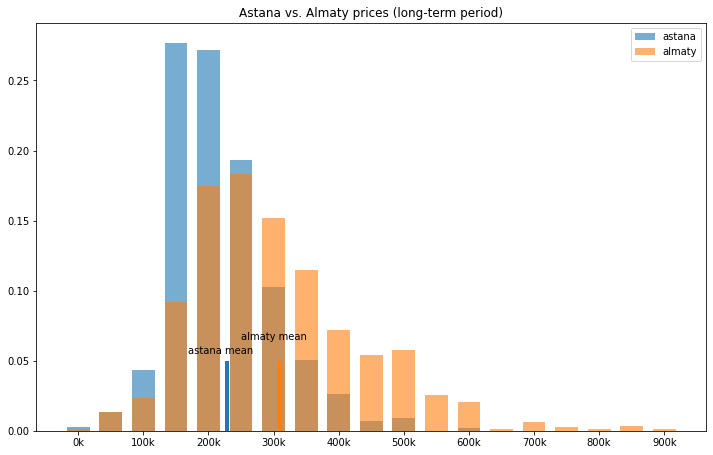

In [17]:
x = df.price.values
i,c = np.unique(x//50000*50000, return_counts=True)

x2 = df2.price.values
i2,c2 = np.unique(x2//50000*50000, return_counts=True)

plt.figure(figsize=(12,7.5))
plt.bar(i,c/c.sum(), width=35000, alpha=0.6, label='astana')
plt.bar(i2,c2/c2.sum(), width=35000, alpha=0.6, label='almaty')
plt.legend()


plt.vlines(x.mean(), 0, 0.05, color='C0', lw=4)
plt.vlines(x2.mean(), 0, 0.05, color='C1', lw=4)

plt.xticks(range(0,1000000,100000), map(lambda x: str(x)+'k', range(0,1000,100)));

plt.text(x.mean()-60000, 0.055, 'astana mean')
plt.text(x2.mean()-60000, 0.065, 'almaty mean')

# plt.vlines(np.median(x), 0, c.mean(), color='C3')

plt.title('Astana vs. Almaty prices (long-term period)')

plt.savefig('output/astana_vs_almaty_longterm.png')

In [152]:
x.mean(), x2.mean(), np.median(x), np.median(x2)

(227759.06924795234, 310298.2750611247, 200000.0, 300000.0)

In [19]:
df = pd.read_json('output/res_astana_short.json')
print(df.shape)
df = df.drop_duplicates()
df = df[df.price < 100000]
df.shape

(3730, 2)


(3633, 2)

In [20]:
df2 = pd.read_json('output/res_almaty_short.json')
print(df2.shape)
df2 = df2.drop_duplicates()
df = df[df.price < 100000]
df2.shape

(1823, 2)


(1755, 2)

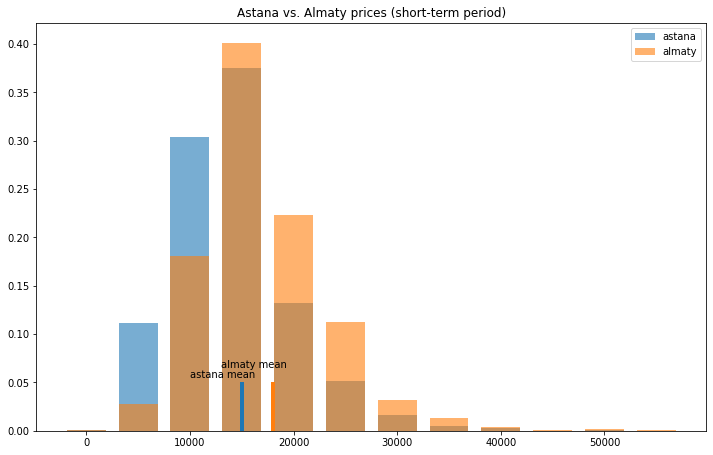

In [21]:
step = 5000

x = df.price.values
i,c = np.unique(x//step*step, return_counts=True)

x2 = df2.price.values
i2,c2 = np.unique(x2//step*step, return_counts=True)

plt.figure(figsize=(12,7.5))
plt.bar(i,c/c.sum(), width=step*0.75, alpha=0.6, label='astana')
plt.bar(i2,c2/c2.sum(), width=step*0.75, alpha=0.6, label='almaty')
plt.legend()


plt.vlines(x.mean(), 0, 0.05, color='C0', lw=4)
plt.vlines(x2.mean(), 0, 0.05, color='C1', lw=4)

# plt.xticks(range(0,1000000,100000), map(lambda x: str(x)+'k', range(0,1000,100)));

plt.text(x.mean()-step, 0.055, 'astana mean')
plt.text(x2.mean()-step, 0.065, 'almaty mean')

# plt.vlines(np.median(x), 0, c.mean(), color='C3')

plt.title('Astana vs. Almaty prices (short-term period)')

plt.savefig('output/astana_vs_almaty_shortterm.png')

In [22]:
x.mean(), x2.mean(), np.median(x), np.median(x2)

(15008.303881090009, 17997.71111111111, 15000.0, 17000.0)